# Preparando ambiente

In [1]:
from google.colab import drive
drive.mount('/content/drive')
dir = '/content/drive/MyDrive/2-PESQUISA/1-ORIENTACOES/IC_GUILHERME_LISBOA/src/'

Mounted at /content/drive


# Função

In [12]:
# importa biblioteca
import re

# função que extrai as informações da última linha de cada família
def extrair_resumo(resumo_str):
    pattern = (r"TOTAL TIME=\s*([\d.]+)\s+"
               r"DELTAX\s*([-.\d]+)\s+"
               r"DELTAY\s*([-.\d]+)\s+"
               r"LAST IMAGE=\s*(\w+)\s+"
               r"END=([A-Z]+).*?"
               r"TOT_IC=\s*(\d+)\s+"
               r"TOT_CGNEG=\s*(\d+)\s+"
               r"TOT_CGPOS=\s*(\d+)")

    match = re.search(pattern, resumo_str)

    if match:
        return {"TOTAL_TIME": float(match.group(1)),
                 "DELTAX": float(match.group(2)),
                 "DELTAY": float(match.group(3)),
                 "LAST_IMAGE": match.group(4),
                 "END": match.group(5),
                 "TOT_IC": int(match.group(6)),
                 "TOT_CGNEG": int(match.group(7)),
                 "TOT_CGPOS": int(match.group(8))}
    return {"raw": resumo_str}

# função de leitura da família
def ler_fam_txt(caminho_arquivo):
    with open(caminho_arquivo, "r") as arquivo:
        linhas = arquivo.readlines()

    familias = []
    familia_atual = None
    cabecalho_dados = None

    for linha in linhas:
        linha = linha.strip()

        if linha.startswith("FAMILY="):
            if familia_atual:
                familias.append(familia_atual)
            familia_atual = {"cabecalho": linha,
                             "sistemas": []}
            cabecalho_dados = None

        elif linha.startswith("SYS#"):
            cabecalho_dados = linha.split()

        elif linha.startswith("TOTAL TIME="):
            familia_atual["resumo"] = extrair_resumo(linha)
            familias.append(familia_atual)
            familia_atual = None
            cabecalho_dados = None

        elif cabecalho_dados and linha:
            valores = linha.split()
            sistema = dict(zip(cabecalho_dados, valores))
            familia_atual["sistemas"].append(sistema)

    return familias

# Exemplo

In [11]:
file = 'famraio_1701_s2.txt'

dados = ler_fam_txt(f'{dir}{file}')

quantidade_familias = len(dados)

print(f"Número de famílias: {quantidade_familias}")

Número de famílias: 25088


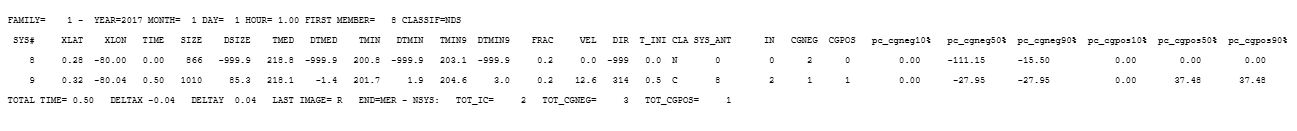

Os dados são salvos nas seguintes chaves:

1.   `cabecalho`:
2.   `sistemas`:
3.   `resumo`:

In [3]:
# acessando as keys do dicionário
dados[0].keys()

dict_keys(['cabecalho', 'sistemas', 'resumo'])

In [4]:
# cabeçalho da primeira familia - PRIMEIRA LINHA
dados[0]["cabecalho"]

'FAMILY=    1 -  YEAR=2017 MONTH=  1 DAY=  1 HOUR= 1.00 FIRST MEMBER=   8 CLASSIF=NDS'

In [5]:
# PRIMEIRA LINHA de dados
dados[0]["sistemas"][0]

{'SYS#': '8',
 'XLAT': '0.28',
 'XLON': '-80.00',
 'TIME': '0.00',
 'SIZE': '866',
 'DSIZE': '-999.9',
 'TMED': '218.8',
 'DTMED': '-999.9',
 'TMIN': '200.8',
 'DTMIN': '-999.9',
 'TMIN9': '203.1',
 'DTMIN9': '-999.9',
 'FRAC': '0.2',
 'VEL': '0.0',
 'DIR': '-999',
 'T_INI': '0.0',
 'CLA': 'N',
 'SYS_ANT': '0',
 'IN': '0',
 'CGNEG': '2',
 'CGPOS': '0',
 'pc_cgneg10%': '0.00',
 'pc_cgneg50%': '-111.15',
 'pc_cgneg90%': '-15.50',
 'pc_cgpos10%': '0.00',
 'pc_cgpos50%': '0.00',
 'pc_cgpos90%': '0.00'}

In [6]:
# acessando a quantidade de cgneg da linha 1 de dados da primeira familia
dados[0]["sistemas"][0]['CGNEG']

'2'

In [7]:
# SEGUNDA LINHA de dados
dados[0]["sistemas"][1]

{'SYS#': '9',
 'XLAT': '0.32',
 'XLON': '-80.04',
 'TIME': '0.50',
 'SIZE': '1010',
 'DSIZE': '85.3',
 'TMED': '218.1',
 'DTMED': '-1.4',
 'TMIN': '201.7',
 'DTMIN': '1.9',
 'TMIN9': '204.6',
 'DTMIN9': '3.0',
 'FRAC': '0.2',
 'VEL': '12.6',
 'DIR': '314',
 'T_INI': '0.5',
 'CLA': 'C',
 'SYS_ANT': '8',
 'IN': '2',
 'CGNEG': '1',
 'CGPOS': '1',
 'pc_cgneg10%': '0.00',
 'pc_cgneg50%': '-27.95',
 'pc_cgneg90%': '-27.95',
 'pc_cgpos10%': '0.00',
 'pc_cgpos50%': '37.48',
 'pc_cgpos90%': '37.48'}

In [8]:
# acessando a XLAT da linha 2 de dados da primeira familia
dados[0]["sistemas"][1]['XLAT']

'0.32'

In [9]:
# LINHA RESUMO de dados - É a ultima linha da familia
dados[0]["resumo"]

{'TOTAL_TIME': 0.5,
 'DELTAX': -0.04,
 'DELTAY': 0.04,
 'LAST_IMAGE': 'R',
 'END': 'MER',
 'TOT_IC': 2,
 'TOT_CGNEG': 3,
 'TOT_CGPOS': 1}

In [10]:
dados[10]["resumo"]['TOTAL_TIME']

1.0